# Spotify API Data Analysis  

## In this notebook, we will visualize the data we collected using the Spotify API and offer some preliminary insights

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

We will store the data from the csv file in a Pandas DataFrame  
Separate dataframes will be created for popular and unpopular songs, defined as the 100 songs with the highest and lowest popularity values as calculated by Spotify

In [4]:
df = pd.read_csv('spotify.csv')

features_list = df.columns.tolist()
metadata_list = features_list[:4]
numeric_list = features_list[4:]

numeric = df[numeric_list]
small_vals = numeric.drop(['popularity', 'tempo', 'duration_ms', 'key', 'loudness', 'time_signature', 'mode'], axis=1)
categorical = df.loc[:,['key', 'mode']]

popular = df.iloc[:100]
numeric_popular = popular[numeric_list]
small_popular = numeric_popular.drop(['popularity', 'tempo', 'duration_ms', 'key', 'loudness', 'time_signature', 'mode'], axis=1)

unpopular = df.iloc[-100:]
numeric_unpopular = unpopular[numeric_list]
small_unpopular = numeric_unpopular.drop(['popularity', 'tempo', 'duration_ms', 'key', 'loudness', 'time_signature', 'mode'], axis=1)

df

,artist,name,id,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,DaBaby,ROCKSTAR (feat. Roddy Ricch),7ytR5pFWmSjzHJIeQkgog4,2020-04-17,100,0.746,0.690,11,-7.956,1,0.1640,0.24700,0.000000,0.1010,0.4970,89.977,181733,4
1,The Weeknd,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,2020-03-20,99,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.3340,171.005,200040,4
2,Jawsh 685,Savage Love (Laxed - Siren Beat),1xQ6trAsedVPCdbtDAmk0c,2020-06-11,97,0.767,0.481,0,-8.520,0,0.0803,0.23400,0.000000,0.2690,0.7610,150.076,171375,4
3,Harry Styles,Watermelon Sugar,6UelLqGlWMcVH1E5c4H7lY,2019-12-13,96,0.548,0.816,0,-4.209,1,0.0465,0.12200,0.000000,0.3350,0.5570,95.390,174000,4
4,Topic,Breaking Me,3H7ihDc1dqLriiWXwsc2po,2019-12-19,96,0.789,0.720,8,-5.652,0,0.2180,0.22300,0.000000,0.1290,0.6640,122.031,166794,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859,070 Shake,SCAR,08xkNDko1wfeqOZdkCXC9K,2020-07-31,62,0.576,0.434,1,-7.769,1,0.0491,0.28400,0.000002,0.1180,0.0588,118.259,187335,4
1860,Beyoncé,"SPIRIT - From Disney's ""The Lion King""",2Zlw9b4RYv2jFxupJCEoN2,2020-07-31,62,0.447,0.436,10,-8.119,1,0.0389,0.00971,0.000000,0.0986,0.0497,80.856,277071,4
1861,J Balvin,Sigo Extrañándote,5Uc9brIj5A76d4TYpLJt94,2020-07-31,42,0.872,0.865,9,-4.248,1,0.2440,0.17400,0.000034,0.1590,0.9350,93.035,202373,4
1862,J Balvin,Brillo,614Z2GSe3D7ckYkGGgTZag,2020-07-31,42,0.524,0.384,9,-10.049,0,0.3600,0.89000,0.000000,0.0964,0.7680,145.947,159573,4


We'll look at the detailed summaries of each dataframe

In [5]:
df.describe(include='all')

,artist,name,id,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1864,1864,1864,1864,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000
unique,655,1845,1864,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Juice WRLD,Riot,1A43TfohQt3H6K5zg28ExD,2020-07-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,45,2,1,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,75.841202,0.686488,0.607362,5.289700,-6.753185,0.611052,0.134269,0.244322,0.015573,0.176098,0.482778,122.176208,194270.862124,3.947425
std,NaN,NaN,NaN,NaN,5.972337,0.149540,0.168876,3.592319,2.964991,0.487642,0.124191,0.245505,0.098409,0.131887,0.222296,30.720173,43747.192867,0.393757
min,NaN,NaN,NaN,NaN,41.000000,0.000000,0.000216,0.000000,-31.839000,0.000000,0.000000,0.000118,0.000000,0.029400,0.000000,0.000000,48000.000000,0.000000
25%,NaN,NaN,NaN,NaN,72.000000,0.594000,0.503000,2.000000,-7.895000,0.000000,0.045175,0.048950,0.000000,0.099200,0.314000,97.894000,168360.250000,4.000000
50%,NaN,NaN,NaN,NaN,75.000000,0.702500,0.619000,5.000000,-6.227000,1.000000,0.078800,0.156000,0.000000,0.123000,0.483000,120.080000,192395.500000,4.000000
75%,NaN,NaN,NaN,NaN,79.000000,0.794000,0.726000,8.000000,-4.996000,1.000000,0.195250,0.372250,0.000014,0.207000,0.651000,144.093000,216001.000000,4.000000


In [6]:
popular.describe(include='all')

,artist,name,id,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100,100,100,100,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
unique,68,100,100,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Taylor Swift,La Curiosidad,0dZpw3h6KZhcHec61qwevZ,2020-07-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,10,1,1,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,90.010000,0.706300,0.599520,5.770000,-6.722860,0.540000,0.123454,0.291009,0.012676,0.170638,0.507486,121.060130,201160.120000,3.990000
std,NaN,NaN,NaN,NaN,2.615011,0.135343,0.160606,3.645545,2.639269,0.500908,0.106743,0.275727,0.075177,0.132446,0.225319,29.106379,38011.028214,0.362232
min,NaN,NaN,NaN,NaN,87.000000,0.298000,0.111000,0.000000,-17.540000,0.000000,0.027400,0.001460,0.000000,0.048900,0.039700,62.948000,129371.000000,1.000000
25%,NaN,NaN,NaN,NaN,88.000000,0.619000,0.503750,2.000000,-8.282000,0.000000,0.045700,0.067225,0.000000,0.092125,0.348750,97.007500,172603.250000,4.000000
50%,NaN,NaN,NaN,NaN,89.000000,0.727000,0.615500,6.000000,-6.367500,1.000000,0.078950,0.200000,0.000000,0.116000,0.510500,118.477500,199794.500000,4.000000
75%,NaN,NaN,NaN,NaN,91.000000,0.807250,0.716000,9.000000,-4.813000,1.000000,0.174750,0.464750,0.000058,0.196750,0.678000,140.421500,222035.000000,4.000000


In [7]:
unpopular.describe(include='all')

,artist,name,id,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100,100,100,100,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
unique,76,100,100,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Beyoncé,The Ones That Didn’t Make It Back Home,6UbUXwQn2CM5mb9vHgt1Gz,2020-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8,1,1,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,66.160000,0.654950,0.630530,5.190000,-6.668230,0.670000,0.124951,0.211465,0.011901,0.162466,0.502306,122.405860,198743.260000,3.940000
std,NaN,NaN,NaN,NaN,4.511982,0.147703,0.162843,3.529658,2.381702,0.472582,0.140924,0.240730,0.086408,0.117248,0.221388,29.959815,45203.529332,0.397467
min,NaN,NaN,NaN,NaN,41.000000,0.330000,0.243000,0.000000,-14.140000,0.000000,0.025800,0.001220,0.000000,0.042100,0.049700,63.761000,60018.000000,1.000000
25%,NaN,NaN,NaN,NaN,66.000000,0.535750,0.517750,2.000000,-8.094250,0.000000,0.037125,0.043675,0.000000,0.095875,0.334750,95.081750,175146.750000,4.000000
50%,NaN,NaN,NaN,NaN,67.000000,0.665000,0.647000,5.000000,-6.401000,1.000000,0.055550,0.105000,0.000000,0.117500,0.512500,120.081500,196959.000000,4.000000
75%,NaN,NaN,NaN,NaN,68.000000,0.762500,0.756250,8.000000,-5.133500,1.000000,0.176000,0.276500,0.000004,0.187000,0.680750,143.995250,222323.500000,4.000000


Next, we'll look at the correlation between the different features using a heatmap

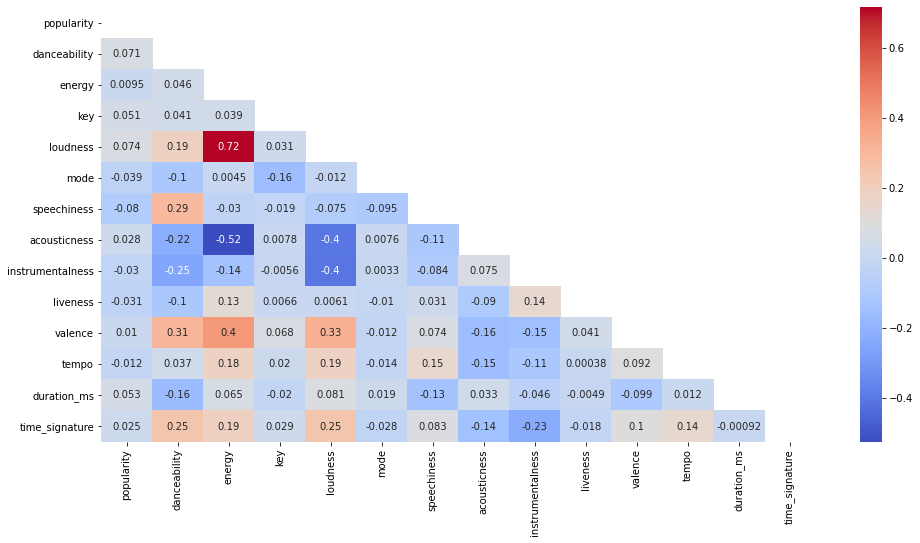

In [8]:
mask = np.triu(numeric.corr())
plt.figure(figsize=(16, 8))
sns.heatmap(numeric.corr(), annot=True, cmap='coolwarm', mask=mask)
plt.show()

Some key observations:  

- Energy and loudness seem to have a positive correlation  
- Energy and valence seem to have a positive correlation  
- Energy and acousticness seem to have a negative correlation  
- Loudness seems to be negatively correlated with both instrumentalness and acousticness  
- Popularity doesn't seem to have any significant correlation with the audio features

Let's plot the means of some of the audio features  
We'll plot only the features whose values are between 0 and 1 so large values won't make the graphs unreadable

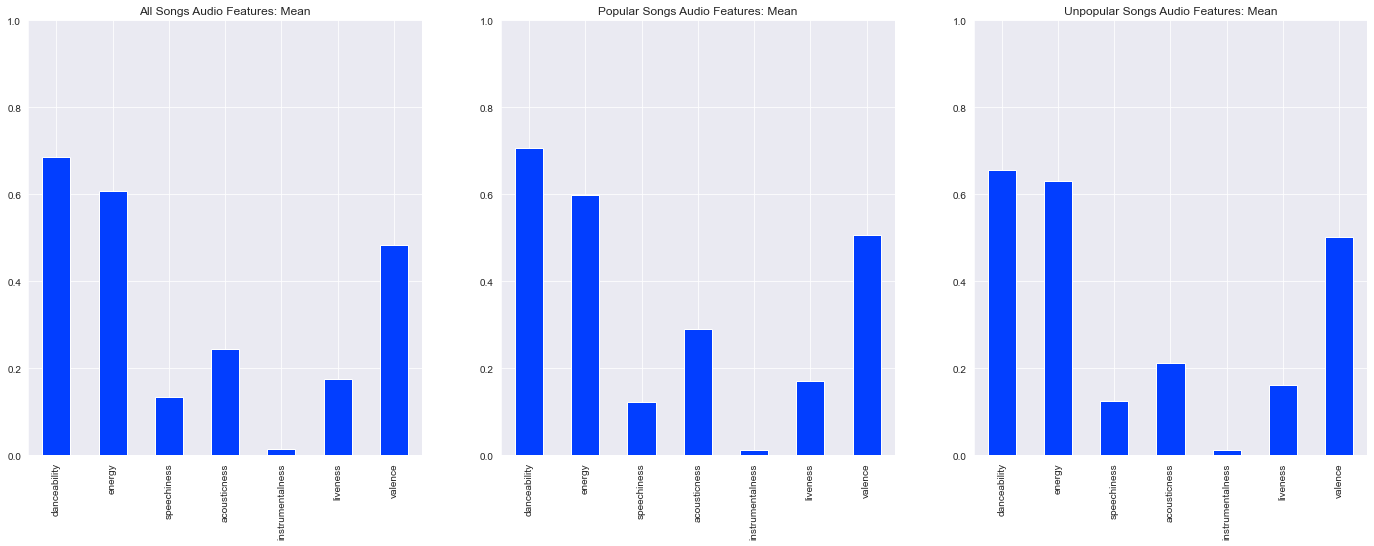

In [28]:
sns.set_palette('bright')
sns.set_style('darkgrid')

plt.figure(figsize=(24, 8))
plt.subplot(1, 3, 1)
small_vals.mean().plot.bar()
plt.title('All Songs Audio Features: Mean')
plt.ylim(0, 1)
plt.subplot(1, 3, 2)
small_popular.mean().plot.bar()
plt.title('Popular Songs Audio Features: Mean')
plt.ylim(0, 1)
plt.subplot(1, 3, 3)
small_unpopular.mean().plot.bar()
plt.title('Unpopular Songs Audio Features: Mean')
plt.ylim(0, 1)
plt.show()

All three plots are very similar, with only small differences in some features  
Popular songs have the highest mean danceability and acousticness, and their mean energy is slightly lower than that of unpopular songs and all analyzed songs  



General trends for all songs:  

Danceability:     High  
Energy:           High  
Speechiness:      Low  
Acousticness:     Low  
Instrumentalness: Very Low  
Liveness:         Low  
Valence:          Medium High  

Let's look at more detailed data of each feature  

We'll plot the distribution of each feature so we can see general trends in each feature and maybe spot outliers

In [16]:
def feature_distplot(feature, df):
    sns.distplot(df[feature])
    plt.axvline(df[feature].mean(), linestyle='--')
    plt.title(feature, size=16)
    if feature in small_vals.columns.tolist():
        plt.xlim((0, 1))

def feature_countplot(feature, df, mapping):
    data = pd.DataFrame({feature: df.sort_values(by=feature).loc[:,feature].map(mapping)})
    sns.countplot(x=feature, data=data)
    plt.title(feature, size=16)

def graph_features(df, save_path=None):
    maps = {'key': {0.0: 'C', 1.0: 'C♯,D♭', 2.0: 'D', 3.0: 'D♯,E♭', 4.0: 'E', 5.0: 'F', 6.0: 'F♯,G♭', 7.0: 'G', 8.0: 'G♯,A♭', 9.0: 'A', 10.0: 'A♯,B♭', 11.0: 'B'}, 'mode': {0.0: 'minor', 1.0: 'major'}}

    num_rows = 4
    num_cols = 3

    plt.figure(figsize=(num_cols * 8, num_rows * 8))
    for i, feature in enumerate(small_vals.columns.tolist()):
        plt.subplot(num_rows, num_cols, i + 1)
        feature_distplot(feature, df)
    for i, feature in enumerate(categorical.columns.tolist()):
        plt.subplot(num_rows, num_cols, i + len(small_vals.columns.tolist()) + 1)
        feature_countplot(feature, df, maps[feature])
    for i, feature in enumerate(['tempo', 'duration_ms', 'loudness']):
        plt.subplot(num_rows, num_cols, i + len(small_vals.columns.tolist()) + len(categorical.columns.tolist()) + 1)
        feature_distplot(feature, df)
    if save_path is not None:
        plt.savefig(save_path)
    plt.show()

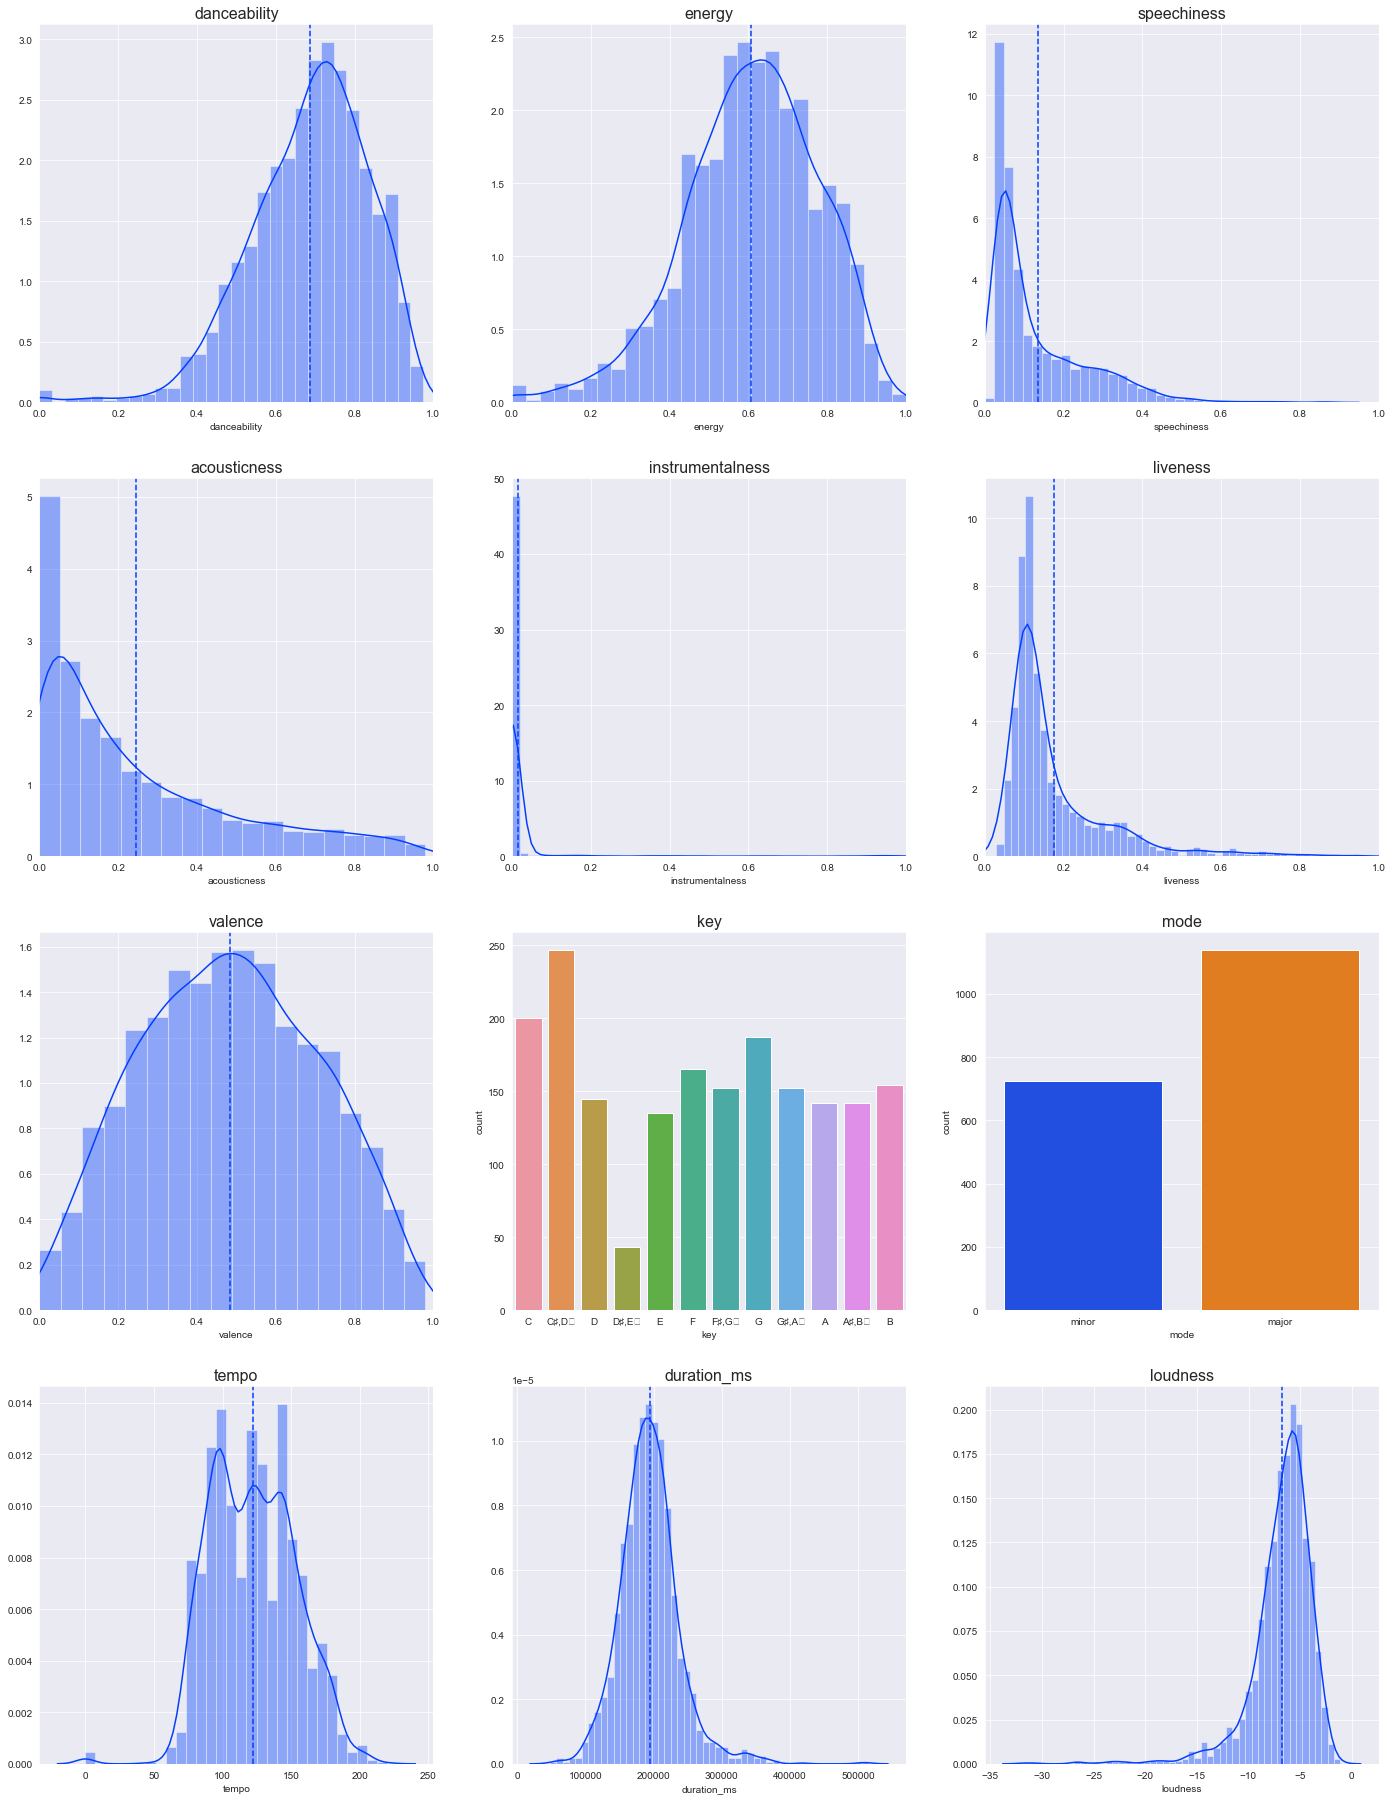

In [18]:
graph_features(df, 'spotify-features-all.png')

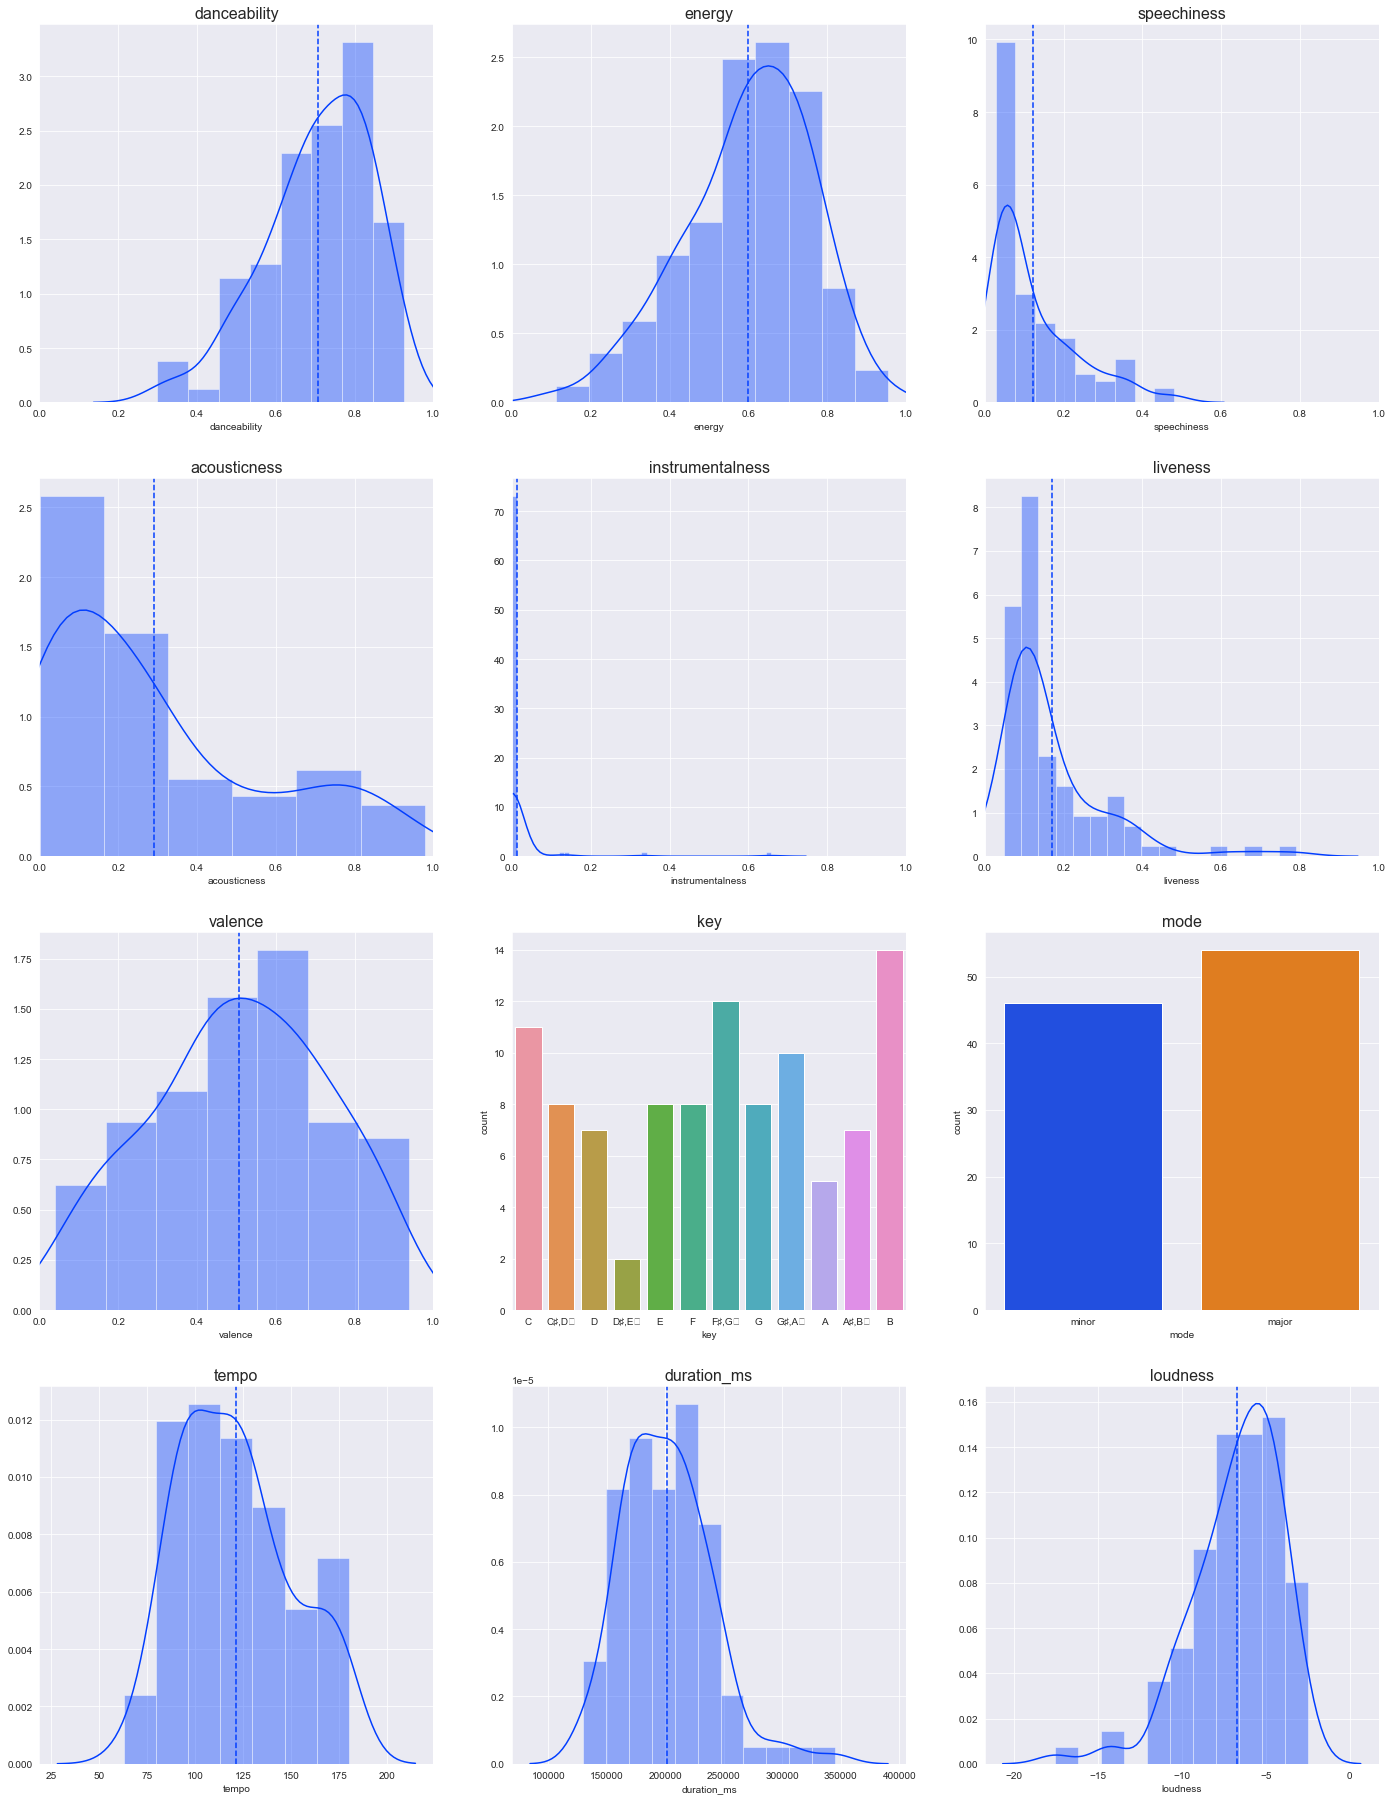

In [19]:
graph_features(popular, 'spotify-features-popular.png')

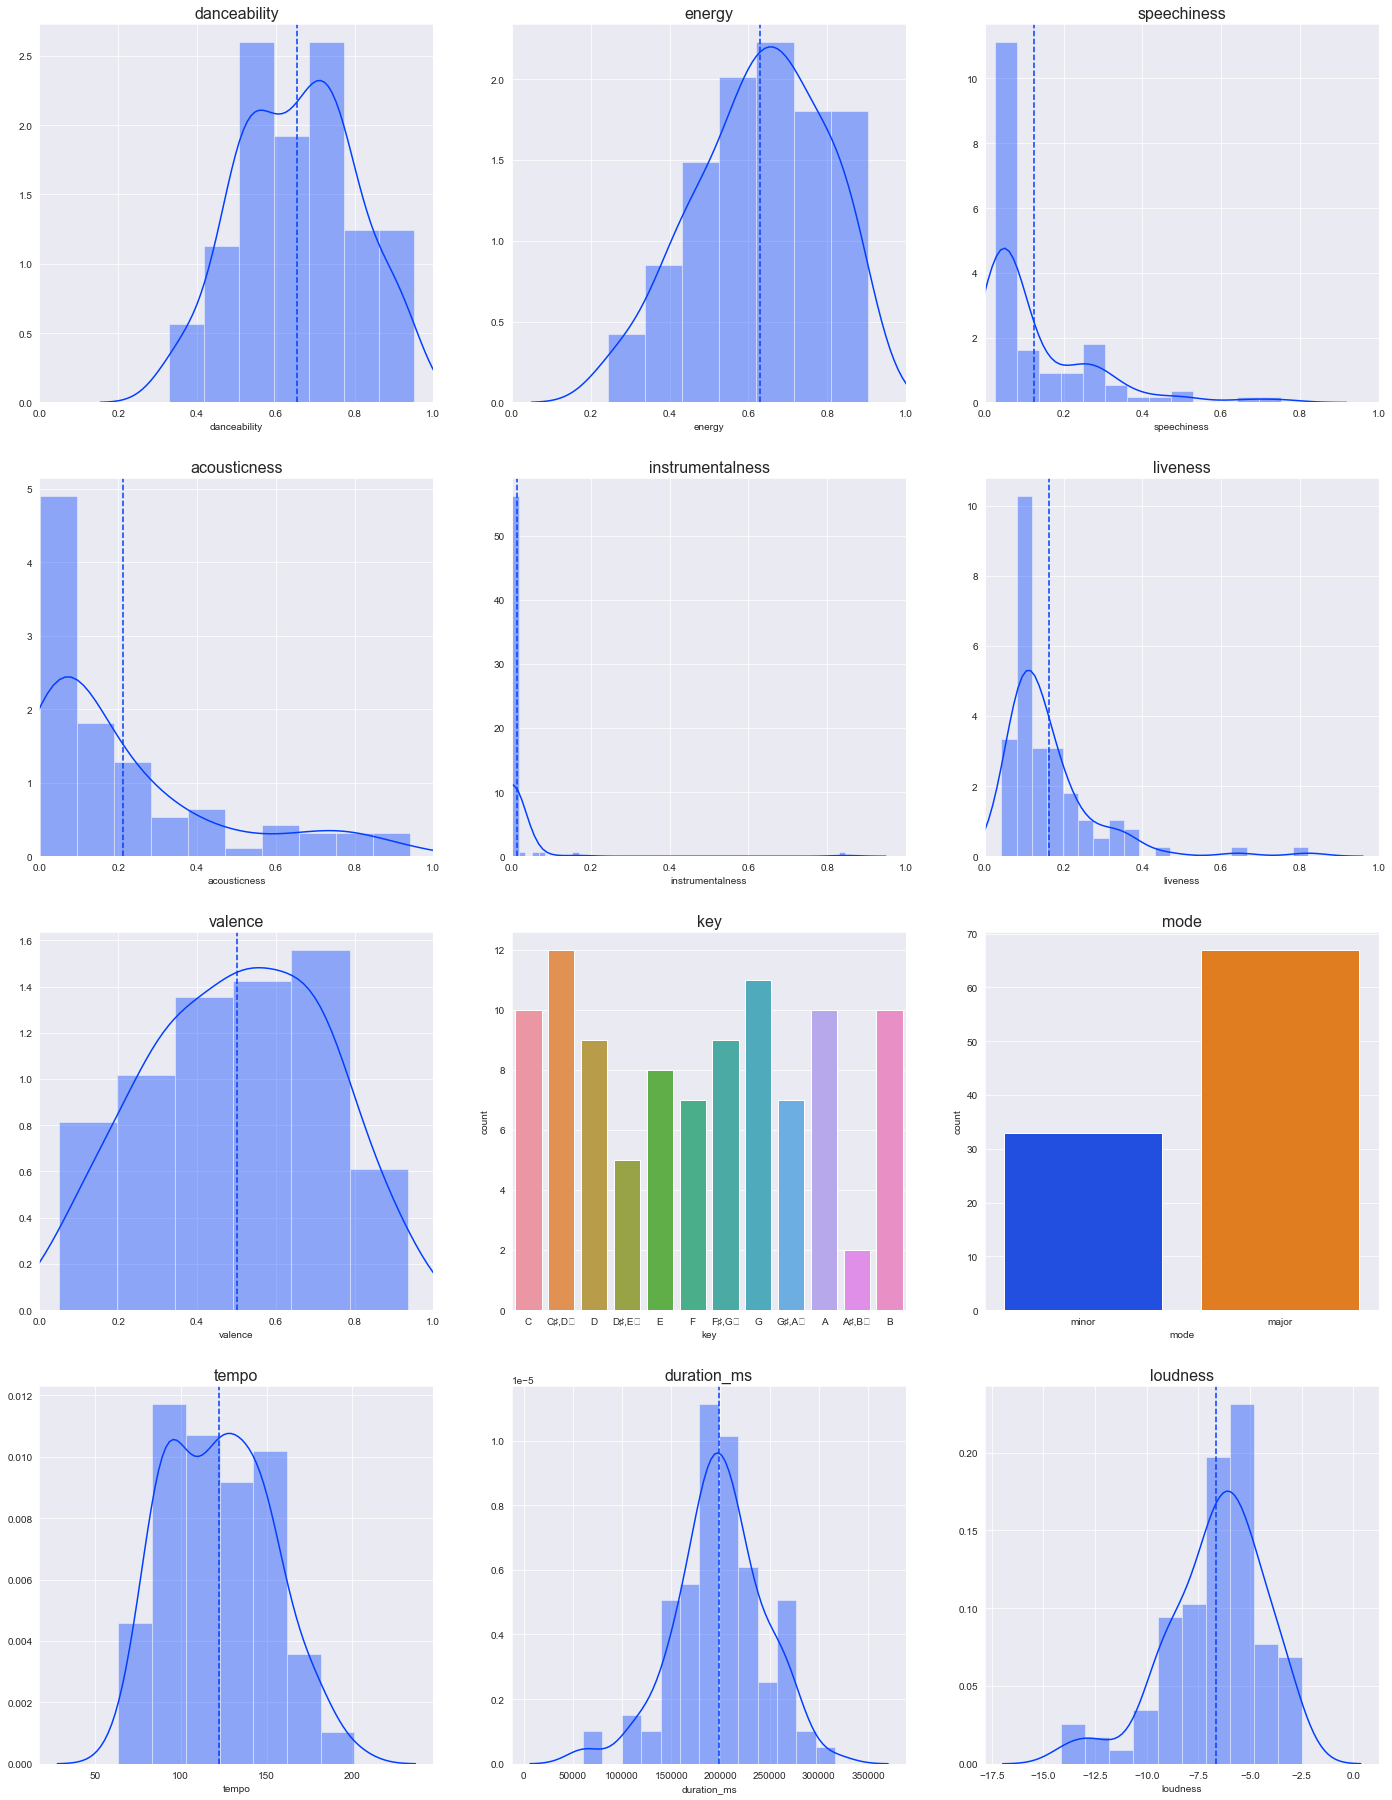

In [20]:
graph_features(unpopular, 'spotify-features-unpopular.png')

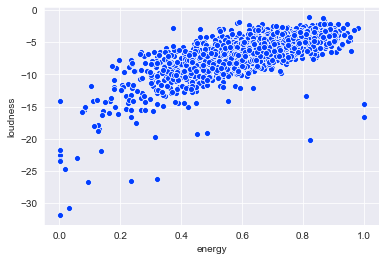

In [21]:
sns.scatterplot(x='energy', y='loudness', data=df)